<a href="https://colab.research.google.com/github/mugivijaygovindraj/resume/blob/main/Feature_Extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=a3e02409edda054ba55c98f243602a584ae1467e9afbf441790e76328005e526
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
import os
import numpy as np
import cv2
from sklearn import svm
from google.colab.patches import cv2_imshow

In [ ]:
known_dir = 'known'
unknown_dir = 'unknown'
TOLERANCE = 0.5
frame_thickness = 3
font_thickness = 2
MODEL = 'cnn'

In [ ]:
#or filename in os.listdir(known_dir):
  #print(filename)
  #img = cv2.imread(f'{known_dir}/{filename}')
  #cv2_imshow(img)

In [ ]:
"""def read_img(path):
 known_dir = (path)
 for filename in os.listdir(known_dir):
   img = cv2.imread(f"{known_dir}/{filename}")
   (h, w) = img.shape[:2]
   width = 500
   ratio = width / float(w)
   height = int(h * ratio)
   nimg = cv2.resize(img, (width, height))
   cv2_imshow(nimg)
read_img('/content/known')"""

'def read_img(path):\n known_dir = (path)\n for filename in os.listdir(known_dir):\n   img = cv2.imread(f"{known_dir}/{filename}")\n   (h, w) = img.shape[:2]\n   width = 500\n   ratio = width / float(w)\n   height = int(h * ratio)\n   nimg = cv2.resize(img, (width, height))\n   cv2_imshow(nimg)\nread_img(\'/content/known\')'

In [ ]:
%cd "/content/known"

/content/known


In [ ]:
path = '/content/known'
known_f = []
known_n = []
for file in os.listdir(path):
  #for filename in os.path.join(path, "name"):
   # image = face_recognition.load_image_file(os.path.join(path,'name'))
    #img_e = face_recognition.face_encodings(image)[0]
    #known_f.append(img_e)
    #known_n.append(name)
   if file.endswith('.jpg'):
    image = cv2.imread(os.path.join(path,file))
    #face_landmarks_list = face_recognition.face_landmarks(image)[0]
    img_e = face_recognition.face_encodings(image)[0]
    known_f.append(img_e)
    known_n.append(file)

In [ ]:
'''imag = face_recognition.load_image_file('/content/unknown/IMG-20231129-WA0014.jpg')
no = ((face_recognition.face_locations(imag)))
print(no)'''


"imag = face_recognition.load_image_file('/content/unknown/IMG-20231129-WA0014.jpg')\nno = ((face_recognition.face_locations(imag)))\nprint(no)"

In [ ]:
clf = svm.SVC(gamma='auto')
clf.fit(known_f,known_n)

SVC(gamma='auto')

In [ ]:
test_image = face_recognition.load_image_file('/content/unknown/v12.jpg')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image, number_of_times_to_upsample=0,model=MODEL)
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image,face_locations)[i]
    name = clf.predict([test_image_enc])
    print(*name)

Number of faces detected:  2
Found:
2.jpg
vardhan.jpg


In [ ]:
path = '/content/unknown'
for file in os.listdir(path):
  if file.endswith('.jpg'):
    print("processing", file)
    img = face_recognition.load_image_file(os.path.join(path,file))
    location = face_recognition.face_locations(img, number_of_times_to_upsample=0, model=MODEL)
    no = len(location)
    print("Number of faces detected: ", no)
    for i in range(no):
     test_image_enc = face_recognition.face_encodings(img,location)[i]
     name = clf.predict([test_image_enc])
     print(*name)
     #uimg_e = face_recognition.face_encodings(img,location)[0]
    #unknown_f.append(uimg_e)
    #result = face_recognition.compare_faces(known_f,uimg_e,TOLERANCE)
    #result = clf.predict([uimg_e])
    #print(result)

processing v9.jpg
Number of faces detected:  0
processing v12.jpg
Number of faces detected:  2
2.jpg
vardhan.jpg
processing v10.jpg
Number of faces detected:  1
vardhan.jpg
processing v4.jpg
Number of faces detected:  1
vardhan.jpg
processing v6.jpg
Number of faces detected:  1
vardhan.jpg
processing v8.jpg
Number of faces detected:  1
vardhan.jpg
processing v5.jpg
Number of faces detected:  1
vardhan.jpg
processing v3.jpg
Number of faces detected:  1
vardhan.jpg
processing v7.jpg
Number of faces detected:  1
vardhan.jpg
processing v11.jpg
Number of faces detected:  1
vardhan.jpg


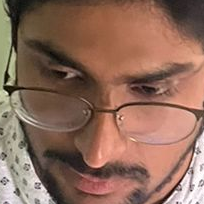

Number of faces detected:  1
vardhan.jpg


In [ ]:
c = cv2.imread('/content/unknown/v4.jpg')
face_locations = face_recognition.face_locations(c, number_of_times_to_upsample=1,model=MODEL)
for face_location in face_locations:
 top, right, bottom, left = face_location
 face_image = c[top:bottom, left:right]
 cv2_imshow(face_image)
 no = len(face_locations)
 print("Number of faces detected: ", no)
 for i in range(no):
  test_image_enc = face_recognition.face_encodings(c,face_locations)[i]
  name = clf.predict([test_image_enc])
  print(*name)


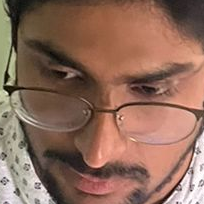

In [ ]:
import numpy as np
c = cv2.imread('/content/unknown/v4.jpg')
face_locations = face_recognition.face_locations(c, number_of_times_to_upsample=0, model="cnn")
top, right, bottom, left = face_location
#p1 = np.float32([[top],[right],[bottom],[left]])
#print(p1)
#p2 = np.float32(c[top:bottom, left:right])
#print(p2)
c = c[top:bottom, left:right]
cv2_imshow(c)
#matrix = getPerspectiveTransform(p1,p2)